# ***Creating a machine learning model to predict positive or negative reviews of restaurants using Natural Language Processing technique***

### ***Creating dataframe***

In [ ]:
import pandas as pd  # importing pandas module 
df = pd.read_csv('/content/Restaurant_Reviews.csv', delimiter='\t',quoting=3 )

In [ ]:
df # viewing dataframe

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info() # printing information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### ***Data cleaning*** 

In [ ]:
x = df['Review'].values # assigning Review values
x = list(x) # converting array datatype into list datatype 

In [ ]:
shape = df.shape # getting shape of dataframe
shape

(1000, 2)

##### ***Stemming***

In [ ]:
import nltk                # importing natural language toolkit library 
nltk.download('stopwords') # downloading stop words 

from nltk.corpus import stopwords          # importing stopwords module
from nltk.stem.porter import PorterStemmer # importing PorterStemmer module

new_stopwords = stopwords.words('english') # assigning english stopwords
new_stopwords.remove('not')                # removing "not" from stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Stemming

import re                              # importing regular expression module
stemmer_algorithm = PorterStemmer()    # calling the PorterStemmer algorithm


stemming_sentence = []  # creating an empty list


for i in range(len(x)):

  only_text  = re.sub('[^a-zA-Z]',' ',x[i]) # allows only text   
  lower_text = only_text.lower()            # convert all text into lowercase
  tokenize   = lower_text.split()           # tokenization 

  # converting original tokenize words into stemming words
  apply_stem = [stemmer_algorithm.stem(word) for word in tokenize if not word in set(new_stopwords)]

  join_stem  = ' '.join(apply_stem)   # join the text into sentence 
  stemming_sentence.append(join_stem) # adding sentence 

##### ***Replacing original sentence into stemming sentence***

In [ ]:
for i in range(shape[0]):
  df['Review'].replace(to_replace = x[i], value =stemming_sentence[i], inplace = True)

### ***Data Visualization***

Text(1, 500, '500')

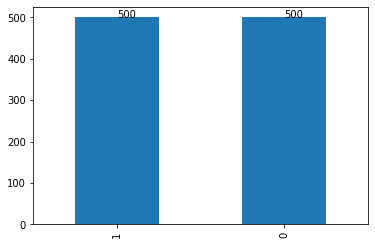

In [ ]:
import matplotlib.pyplot as plt # importing matplotlib.pyplot module

df["Liked"].value_counts().plot(kind="bar") # creating bar plot
y = df["Liked"].value_counts() # assigning value counts 

plt.text(0,y[0],y[0]) # ploting '0'
plt.text(1,y[1],y[1]) # ploting '1'

### ***Spliting datasets into input and output***

In [ ]:
x = df['Review'].values # assigning Review values
y = df['Liked'].values  # assigning Liked values 

### ***Spliting datasets into training dataset and testing dataset***

In [ ]:
# importing train_test_split module
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

### ***Vectorization***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # importing CountVectorizer module
vector = CountVectorizer() # calling the CountVectorizer 

In [ ]:
x_train_vector = vector.fit_transform(x_train) # tranforming to vector  
x_test_vector  = vector.transform(x_test)      # tranforming to vector

### ***Run a classifier Algorithm***

In [ ]:
from sklearn.svm import SVC # importing Support Vector Classifier(SVC) algorithm

### ***Fitting the model***


In [ ]:
model = SVC() # calling Support Vector Classifier(SVC) algorithm
model.fit(x_train_vector, y_train) # fitting train datasets

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### ***Prediting output***

In [ ]:
y_pred = model.predict(x_test_vector) # predicting x_test datasets
y_pred # printing predicted values

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0])

### ***Model Evaluation***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
score_1 = accuracy_score(y_test,y_pred)
score_2 = precision_score(y_test,y_pred)
score_3= recall_score(y_test,y_pred)
print("Accuracy_score  : ",score_1)
print("Precision_score : ",score_2)
print("Recall_score    : ",score_3)

Accuracy_score  :  0.756
Precision_score :  0.8913043478260869
Recall_score    :  0.6165413533834586


In [ ]:
print("                       Classification Report","\n")
print(classification_report(y_test,y_pred))

                       Classification Report 

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       117
           1       0.89      0.62      0.73       133

    accuracy                           0.76       250
   macro avg       0.78      0.77      0.75       250
weighted avg       0.79      0.76      0.75       250



### ***Creating web application for sentiment analysis***

#### ***Installing libraries***

In [ ]:
pip install streamlit # installing streamlit package

     |████████████████████████████████| 8.3 MB 4.2 MB/s 
     |████████████████████████████████| 4.3 MB 67.5 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 180 kB 60.4 MB/s 
     |████████████████████████████████| 111 kB 54.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 124 kB 41.6 MB/s 
     |████████████████████████████████| 788 kB 66.3 MB/s 
     |████████████████████████████████| 370 kB 59.3 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=1eaf0af1ea225929adff02edabfbc5c944cd5f7715d4d7118dc1d3257a3050ee
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting

In [ ]:
pip install pyngrok==4.1.1 # installing pyngrok package 

  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15984 sha256=2f8920c1124f14591cb72514526760c6d27bab3b37abc6c13ebaa0f42989f30e
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


#### ***Creating pipeline***

In [ ]:
from sklearn.pipeline import make_pipeline # importing make_pipeline module

In [ ]:
model = make_pipeline(CountVectorizer(),SVC()) # creating model object

In [ ]:
model.fit(x_train,y_train) # fitting train datasets

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
        

In [ ]:
y_pred = model.predict(x_test) # predicting x_test dataset
y_pred # printing predicted values

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0])

#### ***Dumping pipeline***

In [ ]:
import joblib as job # importing joblib module

job.dump(model,'sentiment analysis file') # dumping pipeline

['sentiment analysis file']

#### ***Creating sentiment_analysis_webapp.py file***

In [ ]:
%%writefile sentiment_analysis_webapp.py 

import streamlit as st  # importing streamlit module
import joblib as job    # importing joblib module

st.title("Sentiment analyser") # creating title 

model = job.load('sentiment analysis file')  # loading machine learning model

user_input = st.text_area('Enter your review : ', height=150) # getting input from user 

# Stemming for user input                                                               

import nltk                 # importing natural language toolkit library 
nltk.download('stopwords')  # downloading stop words 

from nltk.corpus import stopwords          # importing stopwords module
from nltk.stem.porter import PorterStemmer # importing PorterStemmer module

new_stopwords = stopwords.words('english') # assigning english stopwords
new_stopwords.remove('not')                # removing "not" from stopwords

import re                              # importing regular expression module
stemmer_algorithm = PorterStemmer()    # calling the PorterStemmer algorithm

stemming_input = []  # creating an empty list

only_text  = re.sub('[^a-zA-Z]',' ',user_input) # allows only text   

lower_text = only_text.lower()            # convert all text into lowercase
tokenize   = lower_text.split()           # tokenization 
  

# converting original tokenize words into stemming words
apply_stem = [stemmer_algorithm.stem(word) for word in tokenize if not word in set(new_stopwords)]

join_stem  = ' '.join(apply_stem)   # join the text into sentence 
stemming_input.append(join_stem)    # adding sentence into list

predict_output = model.predict(stemming_input) # prediting output

if st.button('Predict'):         # creating button

  if predict_output[0] == 0:     # if review value is 0,its Negative review 
    st.title("Negative Review")  # creating title 

  else:                          # otherwise positive
    st.title("Positive Review")  # creating title 

Writing sentiment_analysis_webapp.py


#### ***Creating public URL***

In [ ]:
from pyngrok import ngrok #importing ngrok module

In [ ]:
!nohup streamlit run sentiment_analysis_webapp.py & # running streamlit 
public_url = ngrok.connect(port = '8501') # Creating public URL
public_url                                # printing public url

nohup: appending output to 'nohup.out'


'http://fcc6-35-194-142-26.ngrok.io'

### ***Sample output***

#### ***Sample screen shot of Positive review output***

---

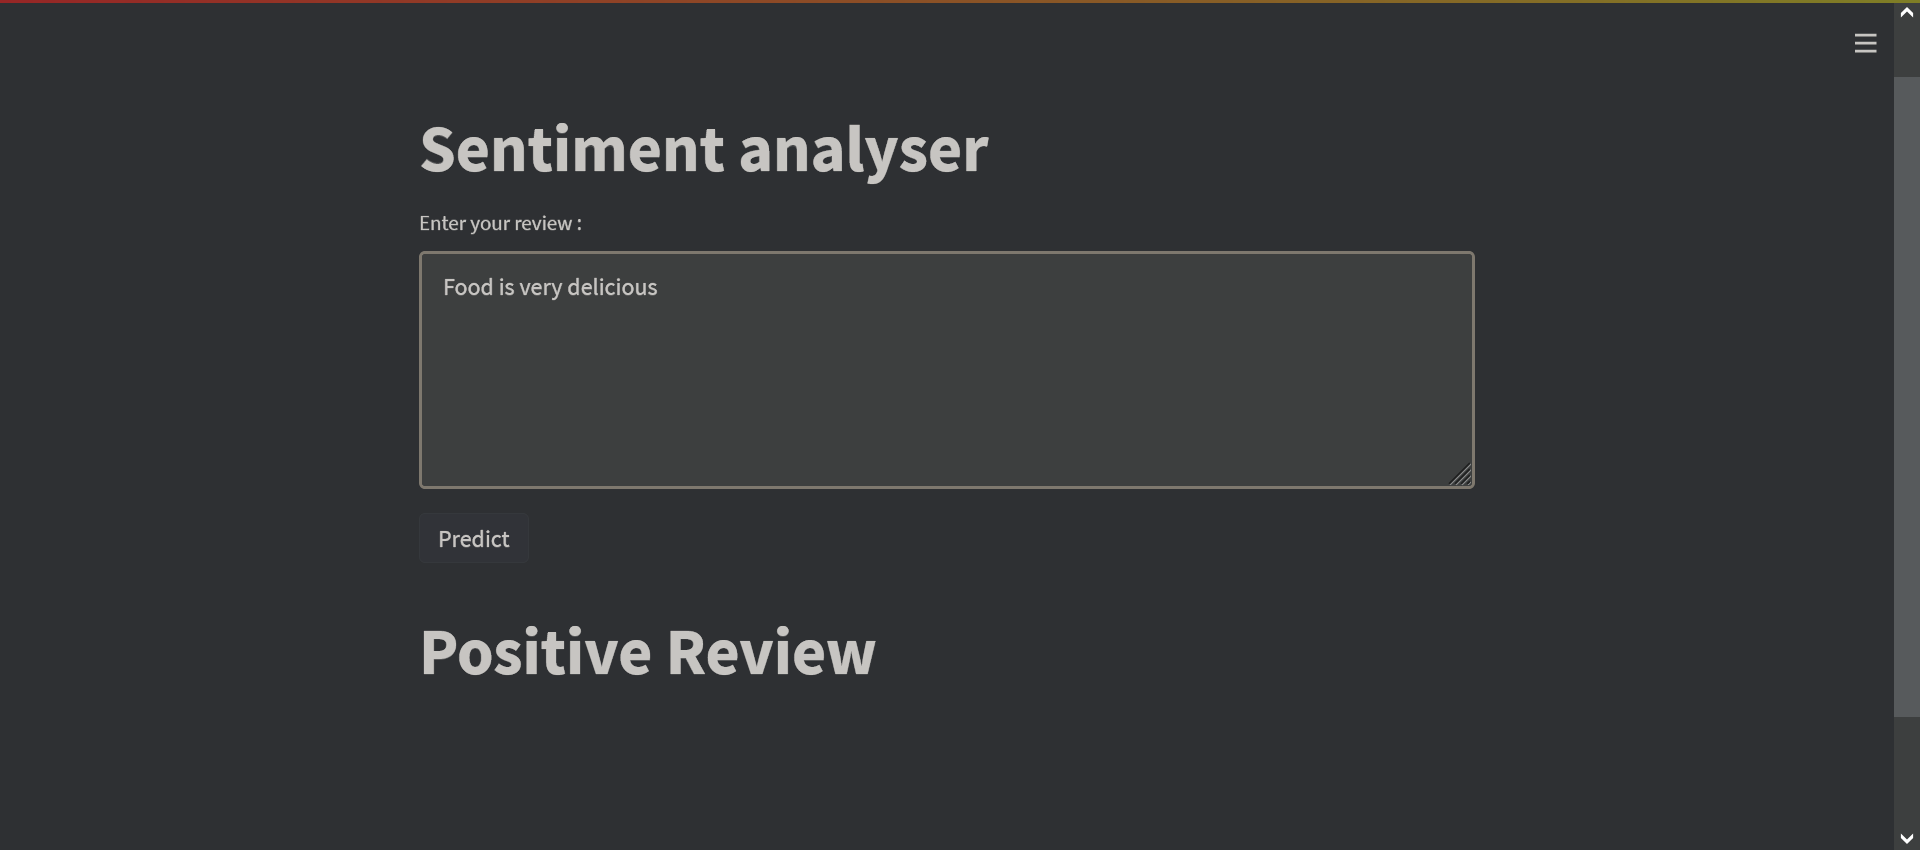

---

#### ***Sample screen shot of Negative review output***

---

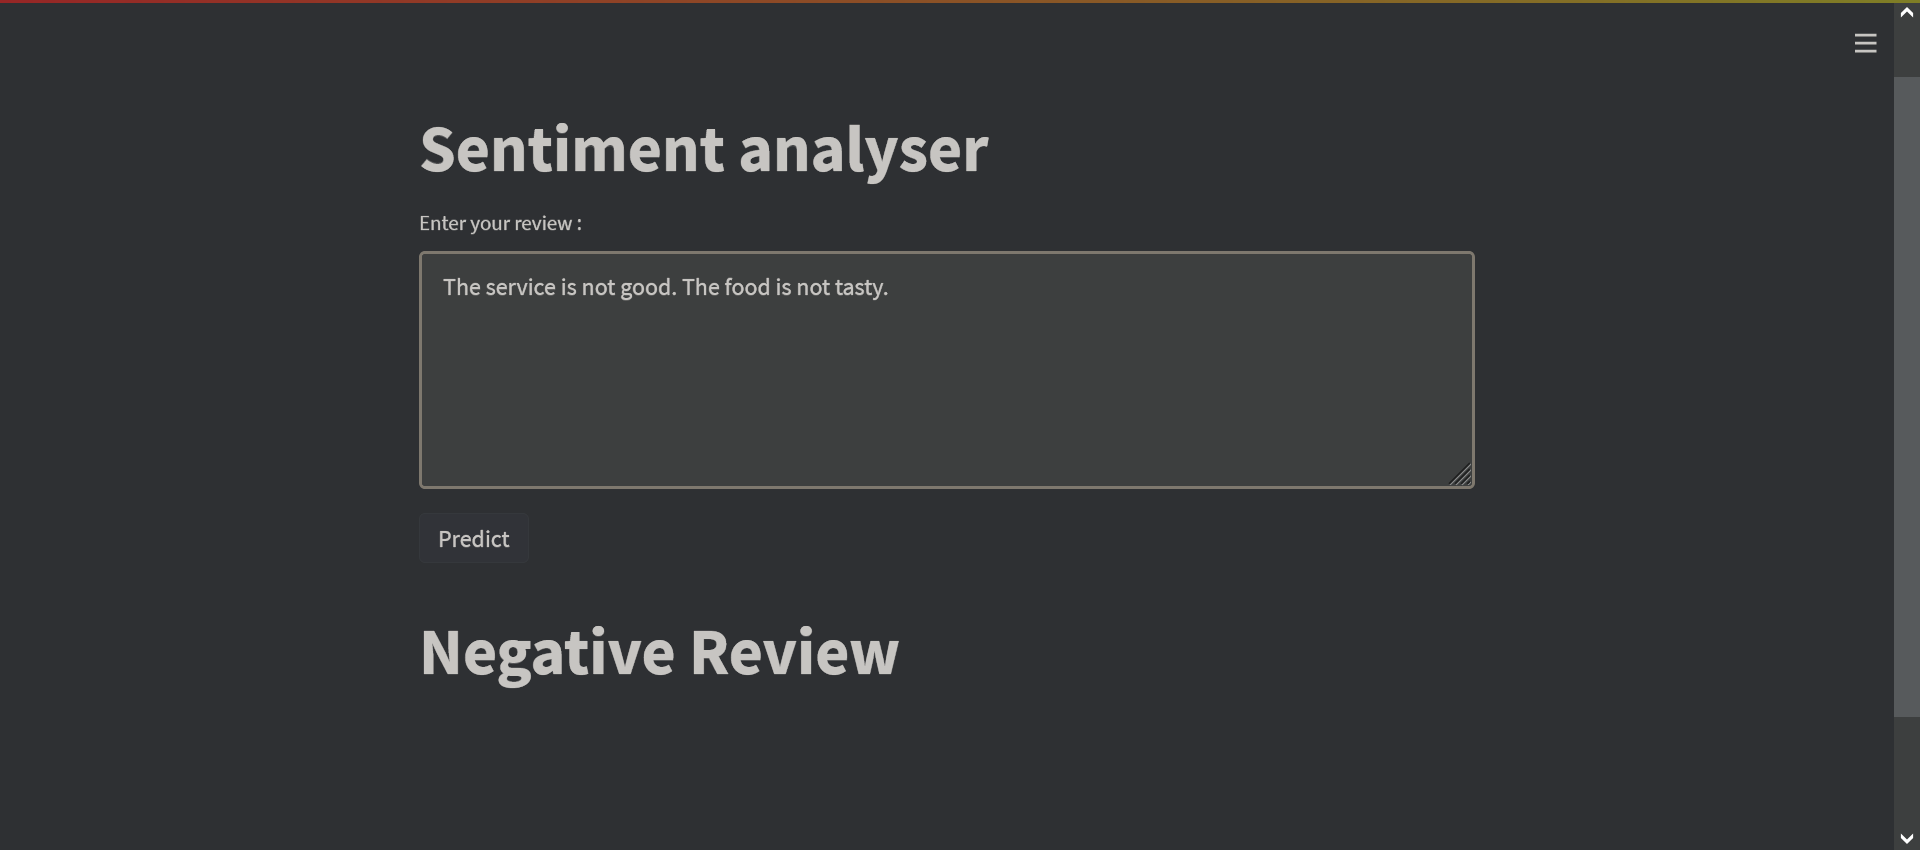

---

